In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Excluding RespondentID NaN

In [4]:
star_wars.iloc[:,0].isnull().value_counts()

False    1186
True        1
Name: RespondentID, dtype: int64

In [5]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [6]:
star_wars.shape

(1186, 38)

In [7]:
star_wars.iloc[:,0].isnull().value_counts()

False    1186
Name: RespondentID, dtype: int64

## Mapping Yes/No answers to Boolean

In [8]:
star_wars.iloc[:,1:3].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,Yes,Yes
2,No,NaN
3,Yes,No
4,Yes,Yes
5,Yes,Yes


In [9]:
star_wars.iloc[:,1].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [11]:
# Convert column "Have you seen any of the 6 films in the Star Wars franchise?" to True/False
star_wars.iloc[:,1] = star_wars.iloc[:,1].map(dict(Yes=True, No=False))
# Convert column "Do you consider yourself to be a fan of the Star Wars film franchise?" to True/False
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(dict(Yes=True, No=False))

## Cleaning the Checkbox columns

In [12]:
star_wars.iloc[:,3:9].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [13]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [14]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_Star Wars: Episode I The Phantom Menace",
        "Unnamed: 4": "seen_Star Wars: Episode II Attack of the Clones",
        "Unnamed: 5": "seen_Star Wars: Episode III Revenge of the Sith",
        "Unnamed: 6": "seen_Star Wars: Episode IV A New Hope",
        "Unnamed: 7": "seen_Star Wars: Episode V The Empire Strikes Back",
        "Unnamed: 8": "seen_Star Wars: Episode VI Return of the Jedi"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_Star Wars: Episode I The Phantom Menace,seen_Star Wars: Episode II Attack of the Clones,seen_Star Wars: Episode III Revenge of the Sith,seen_Star Wars: Episode IV A New Hope,seen_Star Wars: Episode V The Empire Strikes Back,seen_Star Wars: Episode VI Return of the Jedi,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking columns

In [15]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)
star_wars.iloc[:,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


In [16]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

**Renaming "Unnamed" columns**

Legend:
* Unnamed: 10 - Ranking of Star Wars: Episode II Attack of the Clones
* Unnamed: 11 - Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 - Star Wars: Episode IV A New Hope
* Unnamed: 13 - Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 - Star Wars: Episode VI Return of the Jedi

In [17]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_Episode I The Phantom Menace",
        "Unnamed: 10": "ranking_Episode II Attack of the Clones",
        "Unnamed: 11": "ranking_Episode III Revenge of the Sith",
        "Unnamed: 12": "ranking_Episode IV A New Hope",
        "Unnamed: 13": "ranking_Episode V The Empire Strikes Back",
        "Unnamed: 14": "ranking_Episode VI Return of the Jedi"
        })

star_wars.columns[9:15]

Index(['ranking_Episode I The Phantom Menace',
       'ranking_Episode II Attack of the Clones',
       'ranking_Episode III Revenge of the Sith',
       'ranking_Episode IV A New Hope',
       'ranking_Episode V The Empire Strikes Back',
       'ranking_Episode VI Return of the Jedi'],
      dtype='object')

## Highest Ranked Movie

In [18]:
star_wars.iloc[:,9:15]

,ranking_Episode I The Phantom Menace,ranking_Episode II Attack of the Clones,ranking_Episode III Revenge of the Sith,ranking_Episode IV A New Hope,ranking_Episode V The Empire Strikes Back,ranking_Episode VI Return of the Jedi
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


In [19]:
star_wars.iloc[:,9:15].mean()

ranking_Episode I The Phantom Menace         3.732934
ranking_Episode II Attack of the Clones      4.087321
ranking_Episode III Revenge of the Sith      4.341317
ranking_Episode IV A New Hope                3.272727
ranking_Episode V The Empire Strikes Back    2.513158
ranking_Episode VI Return of the Jedi        3.047847
dtype: float64

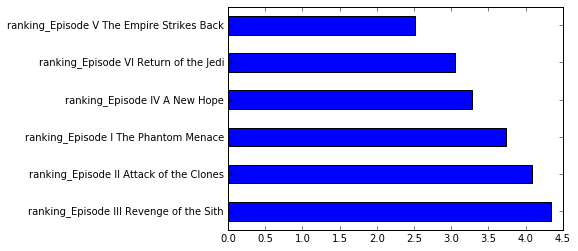

In [33]:
%matplotlib inline
star_wars.iloc[:,9:15].mean().sort_values(ascending=False).plot(kind="barh", color="blue")

The rankings* suggest that the older or classic Star Wars movies are held in higher regard. As we see Episode V and Episode VI have the highest scores. One potential explanation for this is the age distribution as we see below. We can hypothesise that the older generation find these movies better. Nostalgia can also be a factor here.

*Note that lower ranking is better

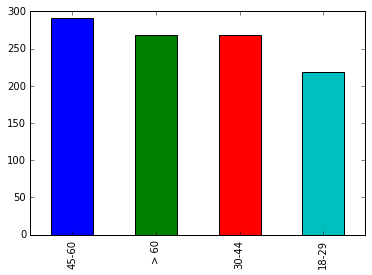

In [34]:
star_wars["Age"].value_counts().plot(kind="bar")

## Finding the most viewed Movie

In [29]:
star_wars.iloc[:,3:9].sum().sort_values(ascending=False)

seen_Star Wars: Episode V The Empire Strikes Back    758
seen_Star Wars: Episode VI Return of the Jedi        738
seen_Star Wars: Episode I The Phantom Menace         673
seen_Star Wars: Episode IV A New Hope                607
seen_Star Wars: Episode II Attack of the Clones      571
seen_Star Wars: Episode III Revenge of the Sith      550
dtype: int64

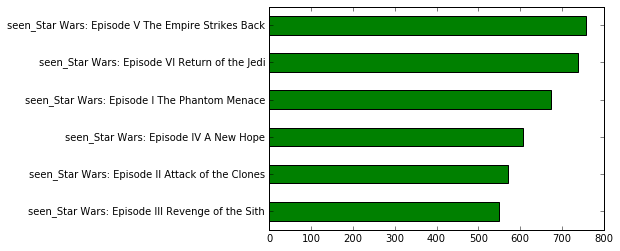

In [31]:
star_wars.iloc[:,3:9].sum().sort_values().plot(kind="barh", color="green")

Above, we see the most viewed movies ranked in descending order. The most viewed movie is Episode V:The Empire Strikes Back. As we saw earlier this is also the highest rated movie. We can assume here that this is one of the reasons that the movie is ranked so high, as it was seen by most people.

## Exploring the data by Gender

In [38]:
# Create Male dataframe
males = star_wars[star_wars["Gender"] == "Male"]
# Create Female dataframe
females = star_wars[star_wars["Gender"] == "Female"]

print(males.shape)
print(females.shape)

(497, 38)
(549, 38)


### Highest ranked movies by Gender
** Males highest ranked movie **

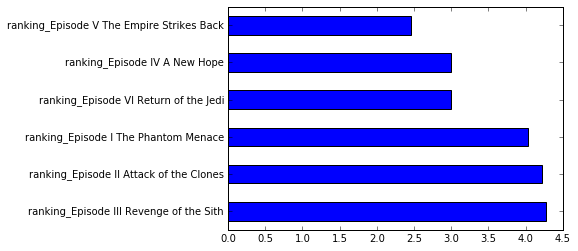

In [39]:
males.iloc[:,9:15].mean().sort_values(ascending=False).plot(kind="barh", color="blue")

** Females highest ranked movie **

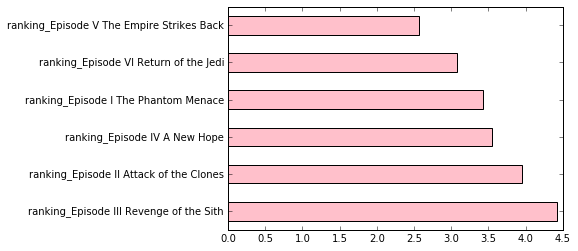

In [43]:
females.iloc[:,9:15].mean().sort_values(ascending=False).plot(kind="barh", color="pink")

### Most seen movies by Gender

** Males most seen movie **

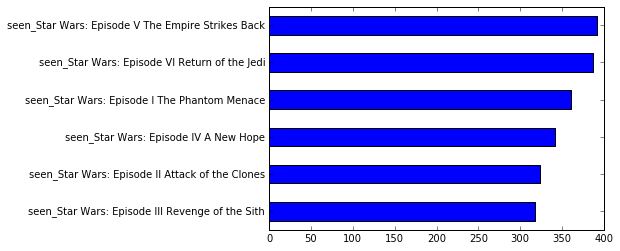

In [46]:
males.iloc[:,3:9].sum().sort_values().plot(kind="barh", color="blue")

** Females most seen movie **

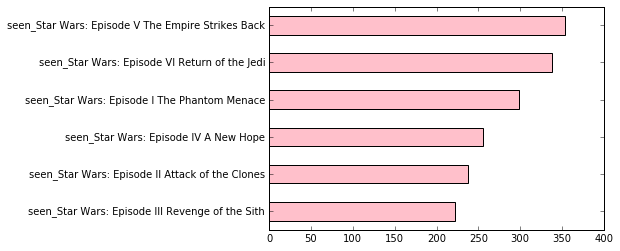

In [47]:
females.iloc[:,3:9].sum().sort_values().plot(kind="barh", color="pink")

From the above we notice: 
* Both males and females have seen the most the same movies
* Males and Females "agree" in the best movie being Episode V:The Empire Strikes Back